## Telecom Industry EDA and resampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mydata = pd.read_csv('C:/Users/user/Desktop/Classification/Ann/Logistic/Imbalance_dataset/Telecom_Industry.csv')

In [3]:
mydata.shape

(3333, 11)

In [4]:
mydata.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [5]:
#mydata.describe()

In [6]:
mydata.head(1)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0


In [7]:
mydata.tail(1)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3332,0,74,1,1,3.7,0,234.4,113,100.0,13.3,13.7


In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3331 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.5 KB


### Checking for null values

In [8]:
mydata.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           2
dtype: int64

In [9]:
data = mydata.copy()

In [10]:
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

In [11]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### Plot 1: Percentage of churn label

In [12]:
%matplotlib inline
plt.rcParams['figure.figsize']=10,3
plt.style.use('seaborn-whitegrid')

Text(0.5, 1.0, '% of Churn')

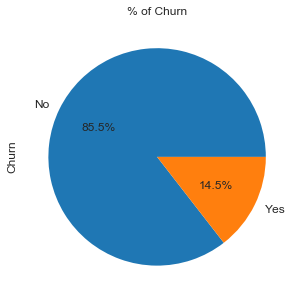

In [13]:
ax = (data['Churn'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

### Plot 2: Contract Renewal

Text(0.5, 1.0, '% of ContractRenewal')

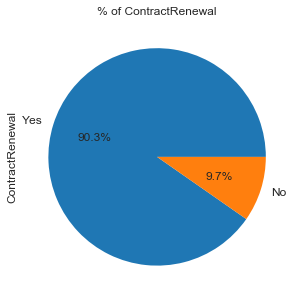

In [14]:
ax = (data['ContractRenewal'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['Yes', 'No'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('ContractRenewal',fontsize = 12)
ax.set_title('% of ContractRenewal', fontsize = 12)

### Plot 3: Count of customer service calls

Text(0.5, 0, 'CustServCalls')

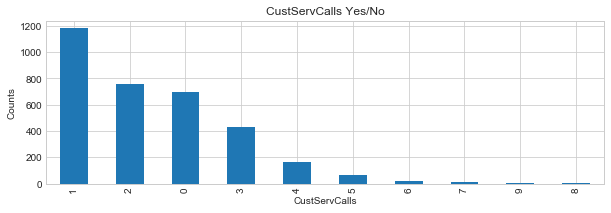

In [15]:

data.CustServCalls.value_counts().plot(kind='bar')
plt.title('CustServCalls Yes/No')
plt.ylabel('Counts')
plt.xlabel('CustServCalls') 


### Plot 4: Dataplan

Text(0.5, 1.0, '% of DataPlan')

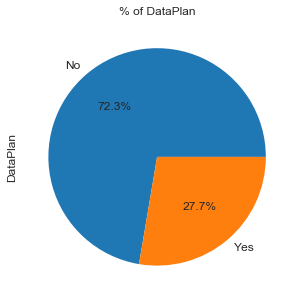

In [129]:
ax = (data['DataPlan'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.set_ylabel('DataPlan',fontsize = 12)
ax.set_title('% of DataPlan', fontsize = 12)

Observation:
Percentage of customers having a dataplan is very high than that of not having a dataplan

### Plot 5: Subplots for Categorical variables

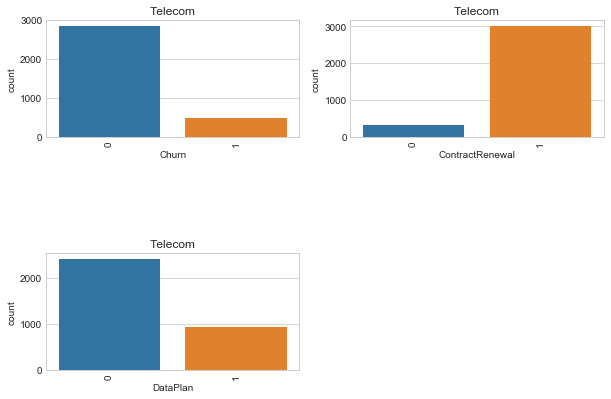

In [16]:
features=['Churn', 'ContractRenewal', 'DataPlan']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("Telecom")
    
plt.show()

### Plot 6: Subplots for continious variables

In [17]:
# Code for single plot
#sns.boxplot(x=data["AccountWeeks"])

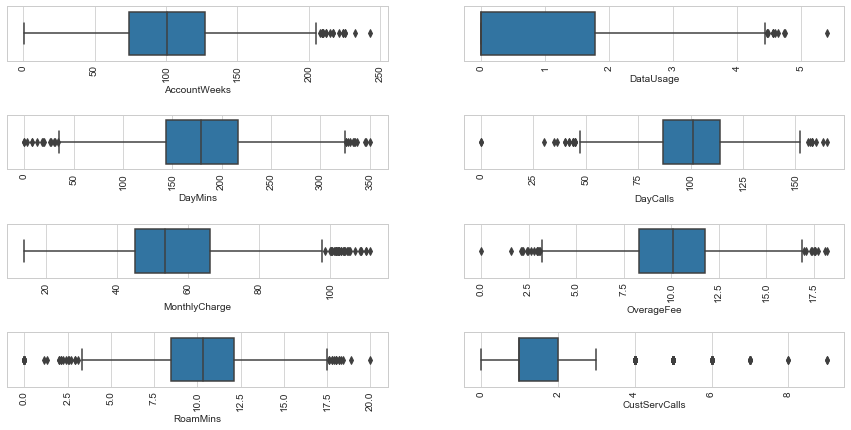

In [18]:
features=['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls','MonthlyCharge','OverageFee','RoamMins', 'CustServCalls']
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(features):
    plt.subplot(8, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(x=j,data = data)
    plt.xticks(rotation=90)
    #plt.title("Telecom")
    
plt.show()

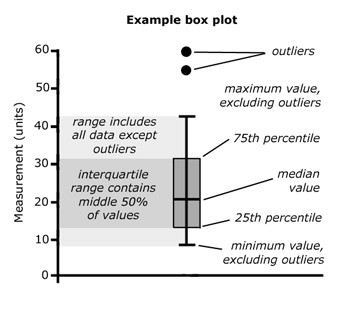
Source: https://medium.com/@mehulved1503/effective-outlier-detection-techniques-in-machine-learning-ef609b6ade72

Note:
The distribution of the sample for specific variables may have a more extreme distribution than normal.
Treating or altering the outlier/extreme values in genuine observations is not a standard operating procedure.
If a data point (or points) is excluded from the data analysis, this should be clearly stated on any subsequent report.
A univariate outlier is a data point that consists of an extreme value on one variable.
A multivariate outlier is a combination of unusual scores on at least two variables.

Only when we are able to find the cause of the outliers, we can remove the outliers and use the existing data

### Plot 7: Data Usage vs Churn

In [19]:
%matplotlib inline
plt.rcParams['figure.figsize']=5,5
plt.style.use('seaborn-whitegrid')

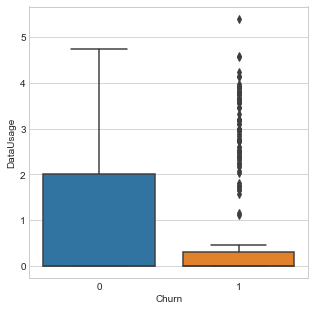

In [20]:
sns.boxplot(x = data.Churn, y = data.DataUsage)
# the customers who do not churn--> more datausage.

### Plot 8: Customer Service call vs Churn

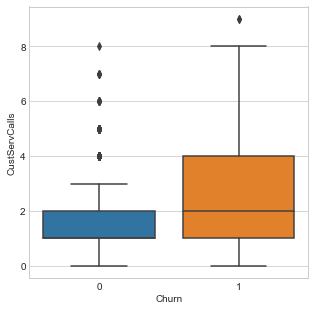

In [21]:
sns.boxplot(x = data.Churn, y = data.CustServCalls)


### Plot 9: Monthly charge vs churn

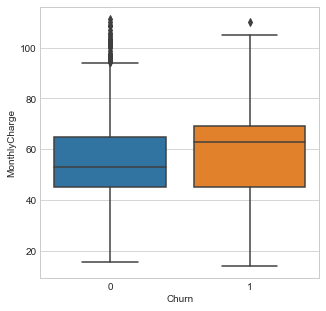

In [22]:
sns.boxplot(x = data.Churn, y = data.MonthlyCharge)


### Plot 10: Roaming minutes vs churn

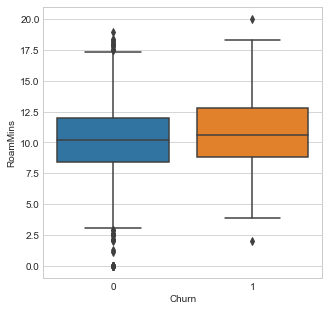

In [38]:
sns.boxplot(x = data.Churn, y = data.RoamMins)


### Plot 11: Customer Service calls vs Churn

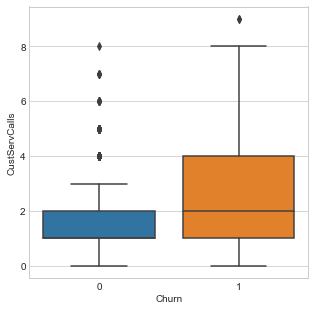

In [39]:
sns.boxplot(x = data.Churn, y = data.CustServCalls)


### How to fix the imbalanced dataset?

#### Undersampling

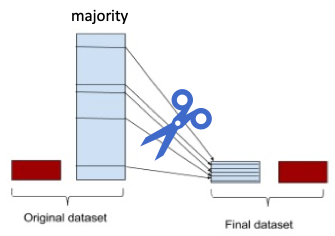

Source: https://towardsdatascience.com

#### Oversampling

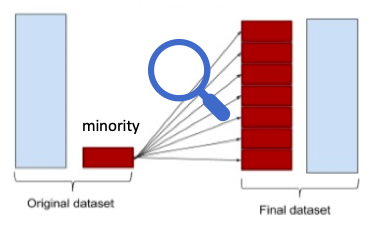

Source: https://towardsdatascience.com

In [23]:
data = mydata.copy()
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)
IV = pd.DataFrame(data, columns=['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'])

DV = pd.DataFrame(data, columns=['Churn'])

In [28]:
IV.head(4)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6


In [29]:
DV.head(4)

,Churn
0,0
1,0
2,0
3,0


In [30]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(DV)))

Original dataset shape Counter({'Churn': 1})


In [27]:
data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

### Method 1: Resampling using make_imbalance

In [39]:
# !pip install imbalanced-learn 

In [40]:
from imblearn.datasets import make_imbalance
IV_1, DV_1 = make_imbalance(IV, DV, ratio={1: 483, 0: 490},
                      random_state=0)
print('Random undersampling {}'.format(Counter(DV_1)))


Random undersampling Counter({0: 490, 1: 483})


Using TensorFlow backend.
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\Anaconda3\lib\site-packages\imblearn\datasets\_imbalance.py:105: UserWarning: 'ratio' has been deprecated in 0.4 and will be removed in 0.6. Use 'sampling_strategy' instead.
  warnings.warn("'ratio' has been deprecated in 0.4 and will be "


### Random Oversampling and Undersampling 

In [176]:
mydata = pd.read_csv('M:\EDA\EDA-Meena\Churn\Telecom_Industry.csv')
data = mydata.copy()
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

DV = data['Churn']
labels = data.columns[1:]
IV = data[labels]


In [177]:

data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [43]:

mydata = pd.read_csv('C:/Users/user/Desktop/Classification/Ann/Logistic/Imbalance_dataset/Telecom_Industry.csv')
data = mydata.copy()
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

X = df_train[labels]
y = df_train['target']

IV = pd.DataFrame(data, columns=['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'])

DV = pd.DataFrame(data, columns=['Churn'])



NameError: name 'df_train' is not defined

### Method 2: Random Undersampling Technique

In [41]:
from imblearn.under_sampling import RandomUnderSampler
print("Length of DV before RUS ",len(DV))

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(IV, DV)
print("Length of DV after RUS ",len(y_rus))
#print('Removed indexes:', id_rus)    
print('')

DV_df1 = pd.DataFrame({'Churn': y_rus[:]})
print('.info()')
DV_df1.info()
print('')
print('count of values')
DV_df1.Churn.value_counts()

Length of DV before RUS  3333
Length of DV after RUS  966



ValueError: If using all scalar values, you must pass an index

### Method 3: Random oversampling Technique

In [42]:
from imblearn.over_sampling import RandomOverSampler
print("Length of DV before ROS ",len(DV))


ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(IV, DV)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print("Length of DV after ROS ",len(y_ros))



DV_df2 = pd.DataFrame({'Churn': y_ros[:]})
print('')
print('.info()')
DV_df2.info()
print('')
print('count of values')
DV_df2.Churn.value_counts()

Length of DV before ROS  3333


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'X' is not defined

### Mehod 4: SMOTE (Synthetic minority oversampling technique)

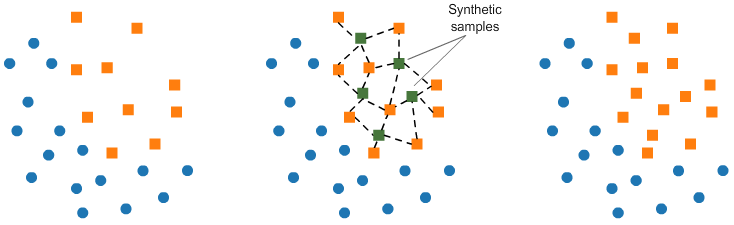

Source: https://www.kaggle.com

In [182]:
mydata = pd.read_csv('M:\EDA\EDA-Meena\Churn\Telecom_Industry.csv')
data = mydata.copy()
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

DV = data['Churn']
labels = data.columns[1:]
IV = data[labels]


In [ ]:
"""
SMOTE(
    sampling_strategy='auto',
    random_state=None,
    k_neighbors=5,
    m_neighbors='deprecated',
    out_step='deprecated',
    kind='deprecated',
    svm_estimator='deprecated',
    n_jobs=1,
    ratio=None,
)
"""

In [200]:
from imblearn.over_sampling import SMOTE

print("Length of DV before smote ",len(DV))


smote = SMOTE(ratio='minority') # resample the minority class.
X_sm, y_sm = smote.fit_sample(IV, DV)

print("Length of DV after smote ",len(y_sm))



DV_df3 = pd.DataFrame({'Churn': y_sm[:]})


print('')
print('count of values')
DV_df3.Churn.value_counts()

Length of DV before smote  3333
Length of DV after smote  5700

count of values


1    2850
0    2850
Name: Churn, dtype: int64

In [198]:
sm = SMOTE(random_state=1, ratio = 0.75)
x_sm2, y_sm2 = sm.fit_sample(IV, DV)
print("Length of DV before smote ",len(DV))
print("Length of DV after smote ",len(y_sm2))



DV_df4 = pd.DataFrame({'Churn': y_sm2[:]})

print('')
print('count of values')
DV_df4.Churn.value_counts()



Length of DV before smote  3333
Length of DV after smote  4987

count of values


0    2850
1    2137
Name: Churn, dtype: int64

In [208]:
sm = SMOTE(ratio = 'not minority')
x_sm3, y_sm3 = sm.fit_sample(IV, DV)
print("Length of DV before smote ",len(DV))
print("Length of DV after smote ",len(y_sm3))



DV_df5 = pd.DataFrame({'Churn': y_sm3[:]})

print('')
print('count of values')
DV_df5.Churn.value_counts()


Length of DV before smote  3333
Length of DV after smote  3333

count of values


0    2850
1     483
Name: Churn, dtype: int64

### Building Logit after SMOTE

In [236]:
mydata = pd.read_csv('M:\EDA\EDA-Meena\Churn\Telecom_Industry.csv')
data = mydata.copy()
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

DV = data['Churn']
labels = data.columns[1:]
IV = data[labels]


In [237]:
from imblearn.over_sampling import SMOTE
print("Length of DV before smote ",len(DV))
smote = SMOTE(ratio='minority') # resample the minority class.
X_sm, y_sm = smote.fit_sample(IV, DV)
print("Length of DV after smote ",len(y_sm))
DV_df3 = pd.DataFrame({'Churn': y_sm[:]})
print('')
print('count of values')
DV_df3.Churn.value_counts()

Length of DV before smote  3333
Length of DV after smote  5700

count of values


1    2850
0    2850
Name: Churn, dtype: int64

In [238]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(X_sm,
                                                    y_sm,
                                                    test_size = .2,
                                                    random_state=12)

In [239]:
from sklearn.linear_model import LogisticRegression


In [240]:
logreg = LogisticRegression()
logreg.fit(x_train_res, y_train_res)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_pred_class = logreg.predict(x_val_res)

In [242]:
from sklearn import metrics
print(metrics.accuracy_score(y_val_res, y_pred_class))

0.7771929824561403


In [243]:
print(metrics.confusion_matrix(y_val_res, y_pred_class))

[[420 122]
 [132 466]]


In [244]:
confusion = metrics.confusion_matrix(y_val_res, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[420 122]
 [132 466]]


In [245]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
#print(metrics.recall_score(y_val_res, y_pred_class))

0.7792642140468228


In [246]:
specificity = TN / (TN + FP)

print(specificity)

0.7749077490774908


In [247]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.22509225092250923


In [248]:
precision = TP / float(TP + FP)

print(precision)
#print(metrics.precision_score(y_val_res, y_pred_class))

0.7925170068027211


In [250]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(x_val_res)[:, 1]

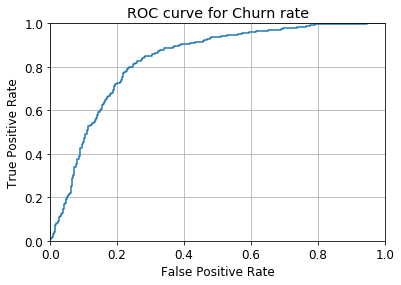

In [253]:
fpr, tpr, thresholds = metrics.roc_curve(y_val_res, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Churn rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

### Building Logit without SMOTE

In [255]:
mydata = pd.read_csv('M:\EDA\EDA-Meena\Churn\Telecom_Industry.csv')
data = mydata.copy()
data.RoamMins.fillna(data.RoamMins.median(), inplace=True)

DV = data['Churn']
labels = data.columns[1:]
IV = data[labels]


In [256]:
sm = SMOTE(ratio = 'not minority')
x_sm3, y_sm3 = sm.fit_sample(IV, DV)
print("Length of DV before smote ",len(DV))
print("Length of DV after smote ",len(y_sm3))



DV_df5 = pd.DataFrame({'Churn': y_sm3[:]})

print('')
print('count of values')
DV_df5.Churn.value_counts()


Length of DV before smote  3333
Length of DV after smote  3333

count of values


0    2850
1     483
Name: Churn, dtype: int64

In [258]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_sm3,
                                                    y_sm3,
                                                    test_size = .2,
                                                    random_state=12)

In [259]:
from sklearn.linear_model import LogisticRegression


In [260]:
logreg = LogisticRegression()
logreg.fit(x_train_res, y_train_res)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [261]:
y_pred_class = logreg.predict(x_val_res)

In [262]:
from sklearn import metrics
print(metrics.accuracy_score(y_val_res, y_pred_class))

0.8605697151424287


In [263]:
print(metrics.confusion_matrix(y_val_res, y_pred_class))

[[560  14]
 [ 79  14]]


In [264]:
confusion = metrics.confusion_matrix(y_val_res, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[560  14]
 [ 79  14]]


In [265]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
#print(metrics.recall_score(y_val_res, y_pred_class))

0.15053763440860216


In [266]:
specificity = TN / (TN + FP)

print(specificity)

0.975609756097561


In [267]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
#print(1 - specificity)

0.024390243902439025


In [268]:
precision = TP / float(TP + FP)

print(precision)
#print(metrics.precision_score(y_val_res, y_pred_class))

0.5


In [269]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(x_val_res)[:, 1]

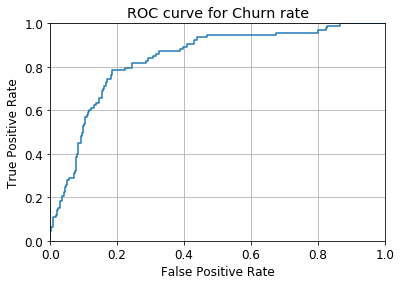

In [270]:
fpr, tpr, thresholds = metrics.roc_curve(y_val_res, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Churn rate')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)